In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [44]:
np.random.seed(42)

#creating random datapoints
def create_random(r, n=100):
    return [(math.cos(2*math.pi/n*x)*r*np.random.normal(-30,30), 
             math.sin(2*math.pi/n*x)*r*np.random.normal(-30,30)) for x in range(1, n+1)]

In [45]:
#random dataframe
df1 = pd.DataFrame(create_random(50,1000))
df2 = pd.DataFrame(create_random(30, 700))
df3 = pd.DataFrame(create_random(10,300))

#Add Noise 
df4 = pd.DataFrame(
    [(np.random.randint(-600,600), np.random.randint(-600,600)) for i in range(300)]
)

In [47]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

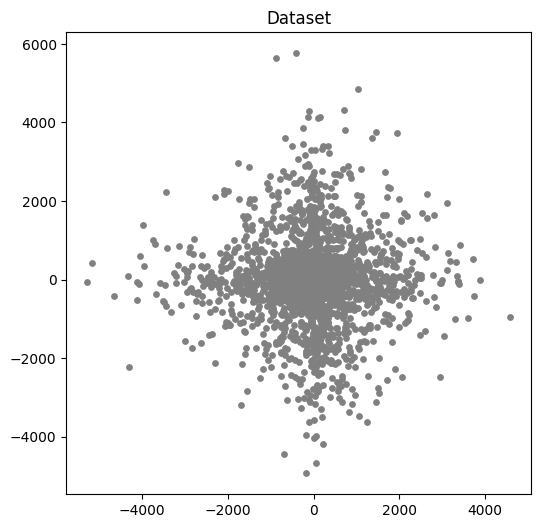

In [48]:
plt.figure(figsize=(6,6))
plt.scatter(df[0], df[1], s=15, c='grey')
plt.title('Dataset')
plt.show()

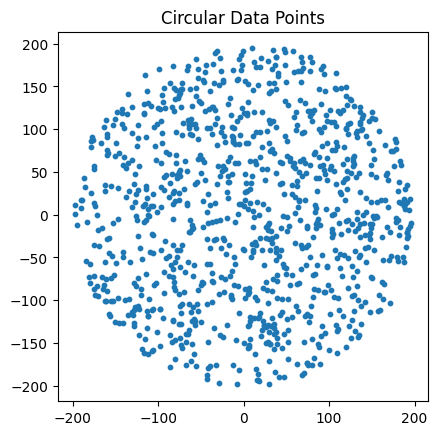

In [52]:
def circular_data(num_points, radius):
    angles = np.random.uniform(0, 2 * np.pi, num_points)
    radii = radius * np.sqrt(np.random.uniform(0, 1, num_points))
    # Convert polar coordinates to Cartesian coordinates
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    
    return x, y

num_points = 1000
radius = 200
circular_x, circular_y = circular_data(num_points, radius)

# Plot the points
plt.scatter(circular_x, circular_y, s=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Circular Data Points')
plt.show()


In [22]:
from sklearn import cluster, datasets, mixture
from sklearn.datasets import make_blobs

In [55]:
#creating different datasets

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs

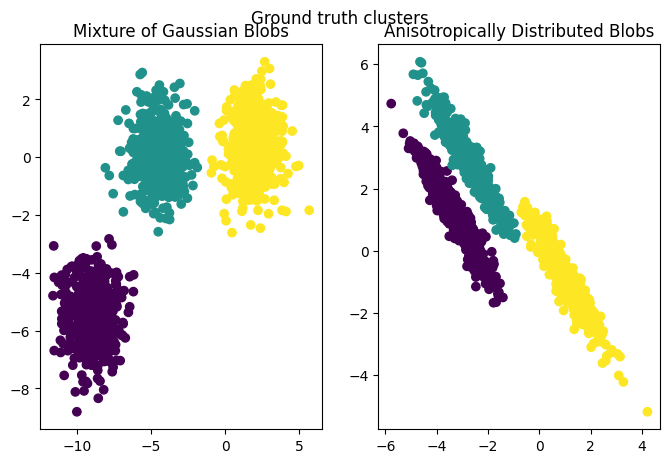

In [62]:

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

ax1.scatter(X[:, 0], X[:, 1], c=y)
ax1.set_title("Mixture of Gaussian Blobs")

ax2.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
ax2.set_title("Anisotropically Distributed Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

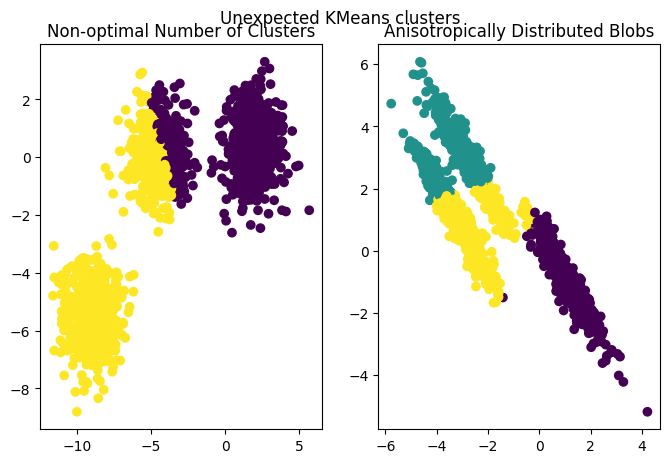

In [63]:
from sklearn.cluster import KMeans

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,5))

y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X)
ax1.scatter(X[:, 0], X[:, 1], c=y_pred)
ax1.set_title("Non-optimal Number of Clusters")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)
ax2.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
ax2.set_title("Anisotropically Distributed Blobs")

plt.suptitle("Unexpected KMeans clusters").set_y(0.95)
plt.show()

Compare datasets with every other cluster...DBSCAN, Agglomerative and ..